In [7]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! kaggle datasets download grassknoted/asl-alphabet
! unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [9]:
!ls asl_alphabet_train/asl_alphabet_train/

A  C  del  F  H  J  L  N	O  Q  S      T	V  X  Z
B  D  E    G  I  K  M  nothing	P  R  space  U	W  Y


In [10]:
import pathlib
import numpy as np
data_dir= pathlib.Path("asl_alphabet_train/asl_alphabet_train/")
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


In [11]:
#view an image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup target directory (we'll view images from here)
  target_folder=target_dir+target_class

  # Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape:; {img.shape}") # show the shape of the image

  return img

  

Image shape:; (200, 200, 3)


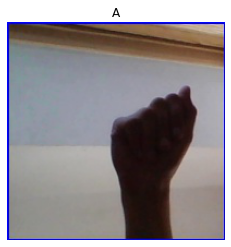

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir="asl_alphabet_train/asl_alphabet_train/",
                        target_class="A")

In [13]:
img

array([[[  0,  10, 254],
        [  0,   1, 252],
        [  7,   0, 254],
        ...,
        [  3,   0, 253],
        [  0,   5, 255],
        [  0,   6, 253]],

       [[  0,   7, 255],
        [  3,   1, 235],
        [ 19,   4, 207],
        ...,
        [ 18,   2, 186],
        [  7,   3, 204],
        [  0,   7, 236]],

       [[  0,   0, 253],
        [ 17,   5, 203],
        [ 51,  33, 135],
        ...,
        [190, 172, 210],
        [177, 166, 255],
        [  7,   4, 197]],

       ...,

       [[  5,   2, 255],
        [  8,   4, 185],
        [132, 135, 178],
        ...,
        [148, 132, 116],
        [141, 128, 197],
        [ 16,   8, 190]],

       [[  0,   0, 254],
        [  7,   9, 208],
        [123, 126, 231],
        ...,
        [140, 128, 192],
        [125, 118, 232],
        [  8,   7, 197]],

       [[  0,   4, 254],
        [  0,   4, 234],
        [  5,   8, 199],
        ...,
        [ 14,   6, 187],
        [  9,   8, 197],
        [  0,   7, 218]]

In [14]:
# View the image shape
img.shape # returns (width, height, colour channels)

(200, 200, 3)

In [15]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.        , 0.03921569, 0.99607843],
        [0.        , 0.00392157, 0.98823529],
        [0.02745098, 0.        , 0.99607843],
        ...,
        [0.01176471, 0.        , 0.99215686],
        [0.        , 0.01960784, 1.        ],
        [0.        , 0.02352941, 0.99215686]],

       [[0.        , 0.02745098, 1.        ],
        [0.01176471, 0.00392157, 0.92156863],
        [0.0745098 , 0.01568627, 0.81176471],
        ...,
        [0.07058824, 0.00784314, 0.72941176],
        [0.02745098, 0.01176471, 0.8       ],
        [0.        , 0.02745098, 0.9254902 ]],

       [[0.        , 0.        , 0.99215686],
        [0.06666667, 0.01960784, 0.79607843],
        [0.2       , 0.12941176, 0.52941176],
        ...,
        [0.74509804, 0.6745098 , 0.82352941],
        [0.69411765, 0.65098039, 1.        ],
        [0.02745098, 0.01568627, 0.77254902]],

       ...,

       [[0.01960784, 0.00784314, 1.        ],
        [0.03137255, 0.01568627, 0.7254902 ],
        [0.51764706, 0

In [60]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [74]:
# Adjust function to work with multi-class
def pred_and_plot_multi(model, filename, class_names,num,numtotal):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  #plt.imshow(img)
  # fig, axs = plt.subplots(nrows=1, ncols=numtotal, figsize=(12,4))
  # plt.sca(axs[num-1])
  plt.figure(figsize=(12, 4))
  plt.subplot(num,numtotal,1)
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [29]:
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss  = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [30]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [20]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import splitfolders
splitfolders.ratio('asl_alphabet_train/asl_alphabet_train/', output="output", seed=11, ratio=(.7, 0.1,0.2)) 

Copying files: 87000 files [00:14, 6039.72 files/s]


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)


train_dir="output/train/"
test_dir="output/test/"

train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             seed=42)

valid_data= valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="categorical")

Found 60900 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [25]:
from keras.api._v2.keras import activations
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_slm=Sequential([
    Conv2D(29,3, activation='relu',input_shape=(224,224,3)),
    Conv2D(29,3,activation='relu'),
    MaxPool2D(),
    Conv2D(29,3,activation='relu'),
    Conv2D(29,3,activation='relu'),
    MaxPool2D(),
    Conv2D(29,3,activation='relu'),
    Conv2D(29,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(29,activation='softmax') #
])


model_slm.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [27]:
from IPython.terminal.interactiveshell import validate
# Fit the model
history_slm =model_slm.fit(train_data,
                           epochs=5,
                           steps_per_epoch=len(train_data),
                           validation_data=valid_data,
                           validation_steps=len(valid_data))

Epoch 1/5
1904/1904 [==============================] - 212s 104ms/step - loss: 0.8635 - accuracy: 0.7457 - val_loss: 0.1631 - val_accuracy: 0.9468
Epoch 2/5
1904/1904 [==============================] - 199s 104ms/step - loss: 0.0903 - accuracy: 0.9707 - val_loss: 0.0598 - val_accuracy: 0.9805
Epoch 3/5
1904/1904 [==============================] - 201s 106ms/step - loss: 0.0540 - accuracy: 0.9824 - val_loss: 0.0739 - val_accuracy: 0.9772
Epoch 4/5
1904/1904 [==============================] - 194s 102ms/step - loss: 0.0368 - accuracy: 0.9880 - val_loss: 0.0571 - val_accuracy: 0.9829
Epoch 5/5
1904/1904 [==============================] - 194s 102ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.1277 - val_accuracy: 0.9625


In [31]:
model_slm.evaluate(valid_data)

544/544 [==============================] - 37s 67ms/step - loss: 0.1277 - accuracy: 0.9625


[0.12767447531223297, 0.9625287652015686]

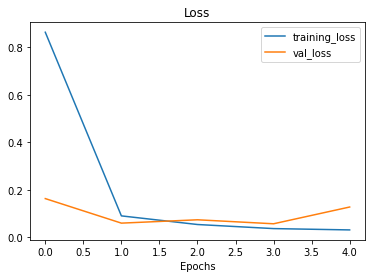

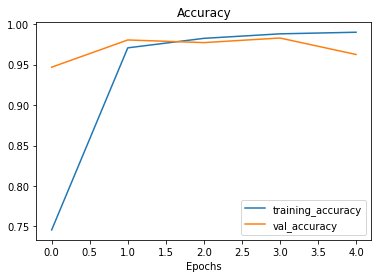

In [32]:
plot_loss_curves(history_slm)

h
H_test.jpg
1/1 [==============================] - 0s 23ms/step
o
O_test.jpg
1/1 [==============================] - 0s 21ms/step
w
W_test.jpg
1/1 [==============================] - 0s 25ms/step
-
1/1 [==============================] - 0s 21ms/step
a
A_test.jpg
1/1 [==============================] - 0s 23ms/step
r
R_test.jpg
1/1 [==============================] - 0s 21ms/step
e
E_test.jpg
1/1 [==============================] - 0s 23ms/step
-
1/1 [==============================] - 0s 22ms/step
y
Y_test.jpg
1/1 [==============================] - 0s 22ms/step
o
O_test.jpg
1/1 [==============================] - 0s 19ms/step
u
U_test.jpg
1/1 [==============================] - 0s 23ms/step


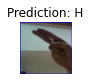

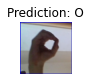

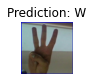

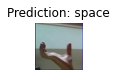

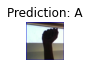

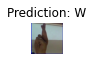

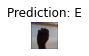

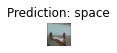

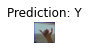

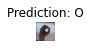

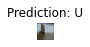

In [75]:
wordstest="how-are-you"
n=1
ntotal=len(wordstest)
for s in list(wordstest):
  print(s)
  if s =="-":
    pred_and_plot_multi(model_slm,"/content/asl_alphabet_test/asl_alphabet_test/space_test.jpg",class_names,n,ntotal)
  else:
    con="/content/asl_alphabet_test/asl_alphabet_test/"+s.upper()+"_test.jpg"
    print(s.upper()+"_test.jpg")
    pred_and_plot_multi(model_slm,con,class_names,n,ntotal)
  n+=1




h
H_test.jpg
1/1 [==============================] - 0s 22ms/step
o
O_test.jpg
1/1 [==============================] - 0s 20ms/step
w
W_test.jpg
1/1 [==============================] - 0s 19ms/step
-
1/1 [==============================] - 0s 20ms/step
a
A_test.jpg
1/1 [==============================] - 0s 19ms/step
r
R_test.jpg
1/1 [==============================] - 0s 20ms/step
e
E_test.jpg
1/1 [==============================] - 0s 19ms/step
-
1/1 [==============================] - 0s 21ms/step
y
Y_test.jpg
1/1 [==============================] - 0s 21ms/step
o
O_test.jpg
1/1 [==============================] - 0s 18ms/step
u
U_test.jpg
1/1 [==============================] - 0s 21ms/step


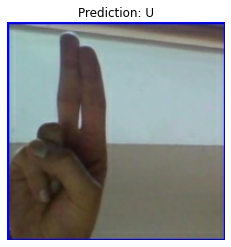

In [46]:
a=0
while a<len(list(wordstest)):
  s=wordstest[a]
  a+=1
  print(s)
  if s =="-":
    pred_and_plot(model_slm,"/content/asl_alphabet_test/asl_alphabet_test/space_test.jpg",class_names)
  else:
    con="/content/asl_alphabet_test/asl_alphabet_test/"+s.upper()+"_test.jpg"
    print(s.upper()+"_test.jpg")
    pred_and_plot(model_slm,con,class_names)

H_test.jpg
1/1 [==============================] - 0s 32ms/step


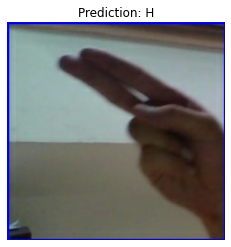

In [48]:
h,e,l,l,o="h","e","l","l","o"
con="/content/asl_alphabet_test/asl_alphabet_test/"+h.upper()+"_test.jpg"
print(h.upper()+"_test.jpg")
pred_and_plot(model_slm,con,class_names)



E_test.jpg
1/1 [==============================] - 0s 20ms/step


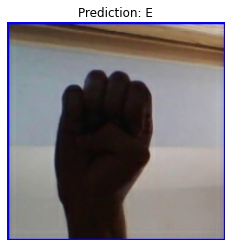

In [49]:
con="/content/asl_alphabet_test/asl_alphabet_test/"+e.upper()+"_test.jpg"
print(e.upper()+"_test.jpg")
pred_and_plot(model_slm,con,class_names)



L_test.jpg
1/1 [==============================] - 0s 21ms/step


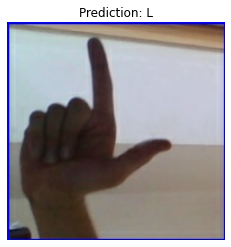

In [51]:
con="/content/asl_alphabet_test/asl_alphabet_test/"+l.upper()+"_test.jpg"
print(l.upper()+"_test.jpg")
pred_and_plot(model_slm,con,class_names)

L_test.jpg
1/1 [==============================] - 0s 34ms/step


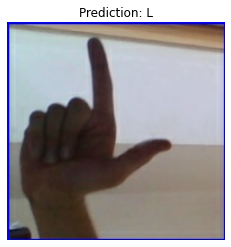

In [52]:

con="/content/asl_alphabet_test/asl_alphabet_test/"+l.upper()+"_test.jpg"
print(l.upper()+"_test.jpg")
pred_and_plot(model_slm,con,class_names)



O_test.jpg
1/1 [==============================] - 0s 22ms/step


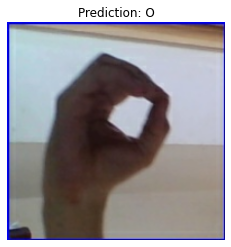

In [53]:
con="/content/asl_alphabet_test/asl_alphabet_test/"+l.upper()+"_test.jpg"


con="/content/asl_alphabet_test/asl_alphabet_test/"+o.upper()+"_test.jpg"
print(o.upper()+"_test.jpg")
pred_and_plot(model_slm,con,class_names)